# College Completion Rate in US States 

### Importing the required packages and libraries 

In [1]:
# Importing NumPy and Pandas

import numpy as np
import pandas as pd

In [2]:
#Import Matplotlib and Seaborn

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset into df

df = pd.read_csv('cc_state_sector_grads.csv')

### Performing initial explorations

We start by looking at the data and gettting familiarized 
with indecies, features, labels, etc.
The data quickly tells us that graduation is tracked for females, F
males, M and combined, B.
Moreover, graduation within 150% of timeframe includes people graduating
withing 100% of timeframe as well.

In [5]:
df.head(10)

,stateid,state,state_abbr,control,level,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,grad_cohort_ct
0,1,Alabama,AL,Private for-profit,4-year,2011,B,A,4y bach,0,0.0,0,NaN,NaN,9
1,1,Alabama,AL,Private for-profit,4-year,2011,B,Ai,4y bach,1,0.0,0,0.0,0.0,9
2,1,Alabama,AL,Private for-profit,4-year,2011,B,B,4y bach,51,2.0,3,3.9,5.9,9
3,1,Alabama,AL,Private for-profit,4-year,2011,B,H,4y bach,1,0.0,0,0.0,0.0,9
4,1,Alabama,AL,Private for-profit,4-year,2011,B,W,4y bach,66,15.0,18,22.7,27.3,9
5,1,Alabama,AL,Private for-profit,4-year,2011,B,X,4y bach,209,39.0,49,18.7,23.4,9
6,1,Alabama,AL,Private for-profit,4-year,2011,F,A,4y bach,0,0.0,0,NaN,NaN,9
7,1,Alabama,AL,Private for-profit,4-year,2011,F,Ai,4y bach,0,0.0,0,NaN,NaN,9
8,1,Alabama,AL,Private for-profit,4-year,2011,F,B,4y bach,26,0.0,0,0.0,0.0,9
9,1,Alabama,AL,Private for-profit,4-year,2011,F,H,4y bach,0,0.0,0,NaN,NaN,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84942 entries, 0 to 84941
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stateid         84942 non-null  int64  
 1   state           84942 non-null  object 
 2   state_abbr      84942 non-null  object 
 3   control         84942 non-null  object 
 4   level           84942 non-null  object 
 5   year            84942 non-null  int64  
 6   gender          84942 non-null  object 
 7   race            84942 non-null  object 
 8   cohort          84942 non-null  object 
 9   grad_cohort     84942 non-null  int64  
 10  grad_100        31760 non-null  float64
 11  grad_150        84942 non-null  int64  
 12  grad_100_rate   30033 non-null  float64
 13  grad_150_rate   75623 non-null  float64
 14  grad_cohort_ct  84942 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 9.7+ MB


Getting some key statistics from the features

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stateid,84942.0,28.179699,15.901155,0.0,16.0,28.0,41.0,56.0
year,84942.0,2007.565162,3.489043,2002.0,2005.0,2008.0,2011.0,2013.0
grad_cohort,84942.0,2308.136658,19414.099744,0.0,6.0,64.0,561.0,891211.0
grad_100,31760.0,1346.772733,9678.350718,0.0,3.0,33.5,409.0,296553.0
grad_150,84942.0,1058.684703,9753.837421,0.0,2.0,20.0,207.0,513263.0
grad_100_rate,30033.0,28.254796,19.921761,0.0,13.1,25.8,41.4,100.0
grad_150_rate,75623.0,39.426019,24.626696,0.0,19.9,39.4,56.8,100.0
grad_cohort_ct,84942.0,23.215512,92.582082,1.0,3.0,7.0,16.0,1180.0


### Creating lattice 
The purpose of this lattice is to gather information about my dataset
finding possible correlations, strange behaviors, etc.
Graduation cohort is strongly correlated with graduation rate. 
Graduation withing 100% of designated timeframe is also 
correlated with gratuation withing 150% of desgnated timeframe. 



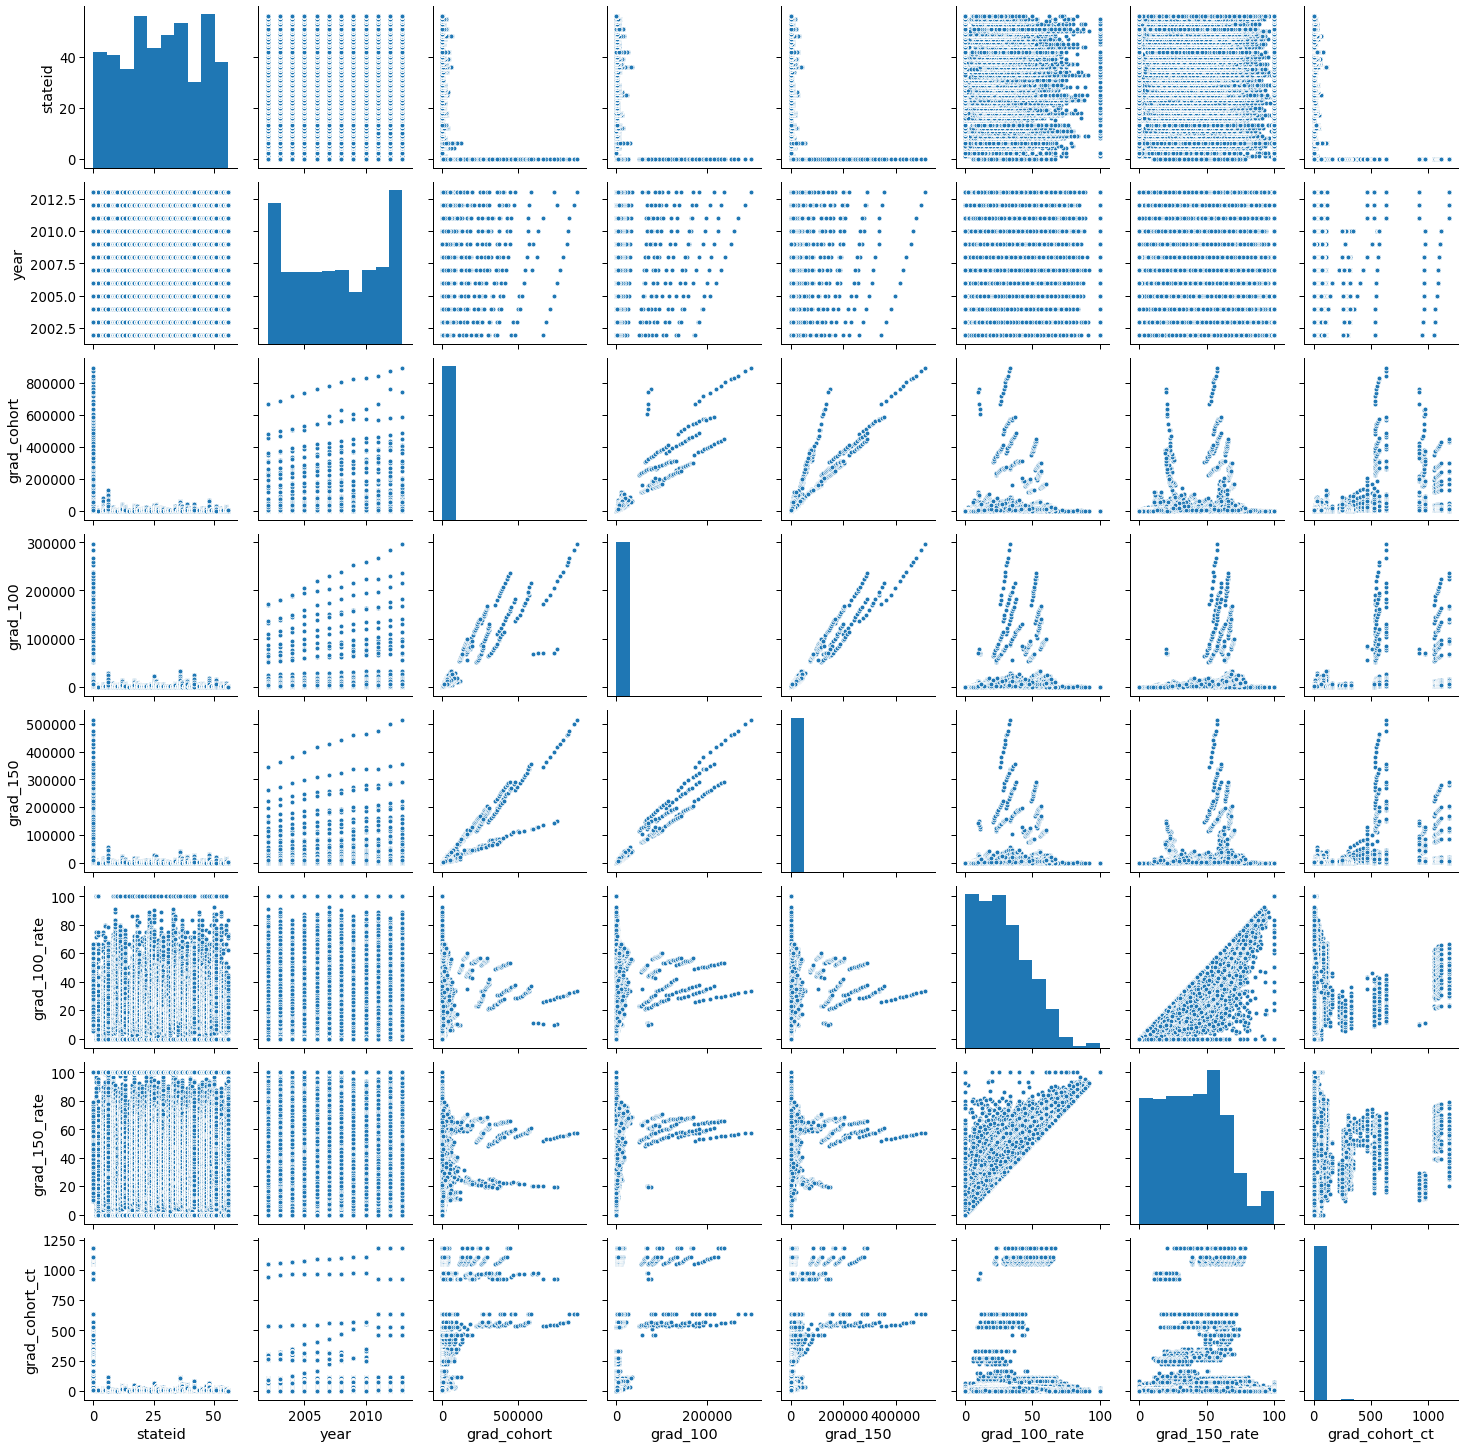

In [36]:
sns.pairplot(df)

In [14]:
#Playing around with data
df.loc[df['gender']=='B'].groupby('state')['grad_150_rate'].mean().sort_values(ascending=False)

state
California              52.691754
Wyoming                 48.940278
New Hampshire           47.271849
Virginia                46.150584
Vermont                 45.457798
Florida                 45.425563
New Jersey              45.376957
Pennsylvania            45.324799
Iowa                    44.393402
Maryland                44.115090
Missouri                44.062399
Illinois                43.976384
Washington              43.574144
Massachusetts           43.525893
Connecticut             43.346286
Oregon                  43.311726
North Carolina          43.032522
Arizona                 41.932794
United States           41.686883
South Carolina          41.580651
Colorado                40.369474
Mississippi             40.203333
New York                40.090143
Alabama                 39.998225
Texas                   39.961774
Rhode Island            39.544056
Delaware                39.353911
Indiana                 39.253744
Nebraska                39.103604
Georgia 

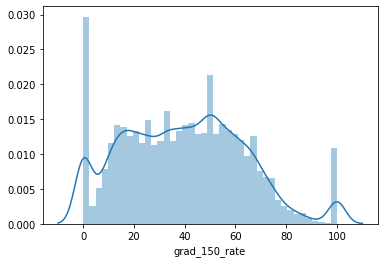

In [15]:
sns.distplot(df[df['gender']=='B']['grad_150_rate'])

### Deciding on the label and features

For the purpose of visualization, graduation at 150% of time
which includes people graduating on time and people graduating 
50% later as the label, while race and gender and state of graduatio is 
used as features for visualization
Note: Later on in the project, when applying machine learning 
teachniques, all features are examined again. Categorical variables
will be converted to dummy variables.



In [40]:
#Selecting the desired features for visualization using pivot tables

dfpivot=df.pivot_table(values='grad_150_rate', index='gender', columns = 'race')

### Using heatmap 
to study mean graduation rate (graduation percentage) across race and gender

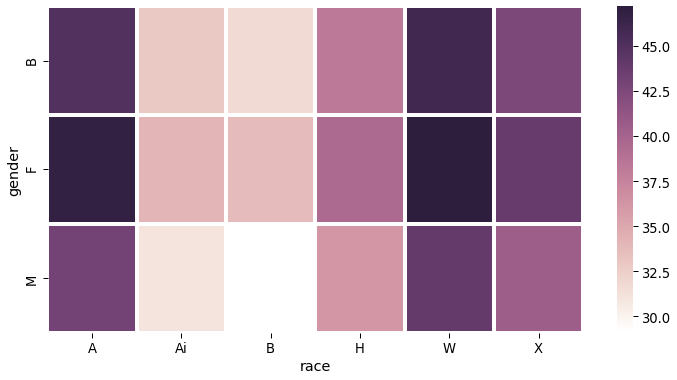

In [41]:
plt.figure(figsize=(12,6))
sns.set_context('paper',font_scale=1.5)
cmap = cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(dfpivot, cmap = cmap, linecolor='white', linewidths = 3)

In [20]:
#Using barplot to study graduation rate nationwide

dfs=df.pivot_table(index="state_abbr", columns="gender", values="grad_150_rate", fill_value=0)
dfs['state'] = dfs.index
dfs.head()

gender,B,F,M,state
state_abbr,,,,
AK,27.550872,28.864263,24.873290,AK
AL,39.998225,41.750837,38.254661,AL
AR,36.684000,38.586147,32.468904,AR
AZ,41.932794,40.722316,41.468333,AZ
CA,52.691754,53.628799,50.298574,CA


Text(0.5, 1.0, 'States Graduation Rate Among Genders')

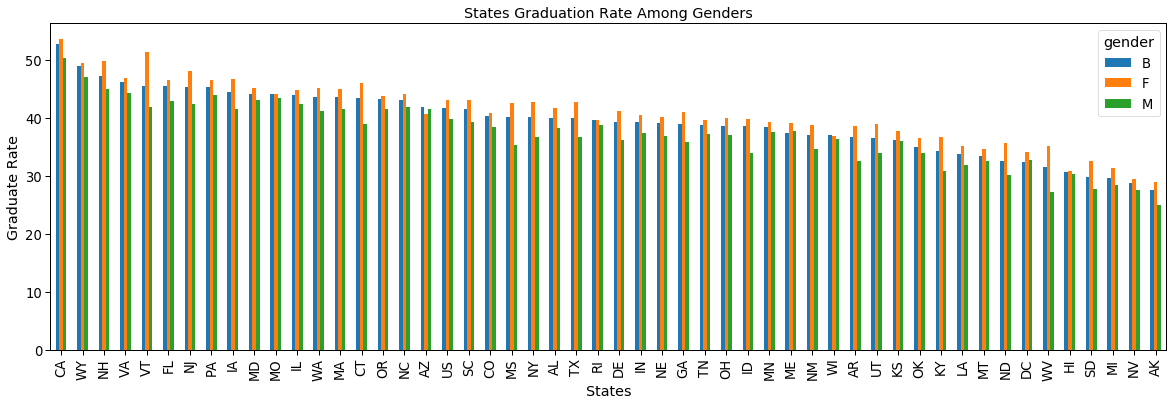

In [38]:
dfs=dfs.sort_values(by='B',ascending=False)
dfs.plot(kind='bar',figsize=(20,6))
plt.ylabel('Graduate Rate')
plt.xlabel('States')
plt.title('States Graduation Rate Among Genders')

### Creating an interactive map of nationwide graduation rate
Note: Other than Pandas and NumPy, "Chart Studio" must be installed too.

In [23]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [24]:
init_notebook_mode(connected=True) 

In [25]:
#Building data dictionary

data = dict(type = 'choropleth',
            locations = dfs['state'],
            locationmode = 'USA-states',
            colorscale= 'Greens',
            #text= ['text1','text2','text3'],
            z=dfs['B'],
            colorbar = {'title':'Graduate Rate'})

In [26]:
#Building nested dictionary

layout = dict(geo = {'scope':'usa'})

In [27]:
#Set up object to be passed into iplot()

choromap = go.Figure(data = [data],layout = layout)

In [28]:
#Plotting the interactive map of US with our graduation rate data

iplot(choromap)